In [1]:
import sys
import warnings
from time import time
from tensorflow.keras import utils, losses, optimizers, callbacks
from tensorflow.keras.layers import Dropout, ReLU, Dense, BatchNormalization
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
import tensorflow

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, h5py
import matplotlib.style as style; style.use('fivethirtyeight')
%matplotlib inline

# Metrics and preprocessing
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
# Read the h5 file

h5_SVH = h5py.File('SVHN_single_grey1.h5', 'r')

# Load the training, validation and test sets
X_train = h5_SVH['X_train'][:]
y_train_o = h5_SVH['y_train'][:]
X_val = h5_SVH['X_val'][:]
y_val_o = h5_SVH['y_val'][:]
X_test = h5_SVH['X_test'][:]
y_test_o = h5_SVH['y_test'][:]

# Close this file

h5_SVH.close()

print('Training set', X_train.shape, y_train_o.shape)
print('Validation set', X_val.shape, y_val_o.shape)
print('Test set', X_test.shape, y_test_o.shape)

print('\n')
print('Unique labels in y_train:', np.unique(y_train_o))
print('Unique labels in y_val:', np.unique(y_val_o))
print('Unique labels in y_test:', np.unique(y_test_o))

Training set (42000, 32, 32) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000,)


Unique labels in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique labels in y_val: [0 1 2 3 4 5 6 7 8 9]
Unique labels in y_test: [0 1 2 3 4 5 6 7 8 9]


- Number of images in train , validation and test set are in thousands. The 32 x 32 are the number of dimensions or we can say the width and height of each image. 
- Also, we have 10 categorical values in Y sets from 0 to 9 digits

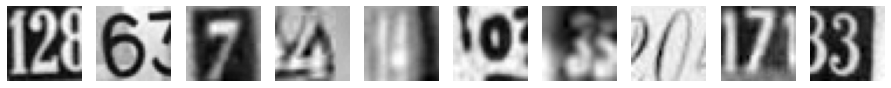

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [14]:
plt.figure(figsize=(14, 3))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train_o[0:10]))

- The images have only 1 kernal Black and White. 
- The 0 intensity represents black and 255 represents white.
- We see that there are more than 1 number in an image but the center one is picked. Also there are blur images.

In [3]:
# Converting the labels to one hot coded values
y_train = to_categorical(y_train_o)
y_val = to_categorical(y_val_o)
y_test = to_categorical(y_test_o)

In [13]:
print(y_train[10])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
print('X_train shape:', X_train.shape)
print('X_val shape:', X_val.shape)
print('X_test shape:', X_test.shape)

print('\n')
print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)
print('y_test shape:', y_test.shape)

X_train shape: (42000, 32, 32)
X_val shape: (60000, 32, 32)
X_test shape: (18000, 32, 32)


y_train shape: (42000, 10)
y_val shape: (60000, 10)
y_test shape: (18000, 10)


### Creating Simple NN model with fully connected layer and using relu. Keeping the learning rate low to check whether the data can do good or not

In [59]:
# Initialize Sequential model
model1 = tensorflow.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 = 1024 (flattening process)
model1.add(tensorflow.keras.layers.Reshape((1024,),input_shape=(32,32,)))

# Normalize data using batch
model1.add(tensorflow.keras.layers.BatchNormalization())

In [60]:
# Hidden layers
model1.add(tensorflow.keras.layers.Dense(200, activation='relu', name='Layer_1'))

#Output layer
model1.add(tensorflow.keras.layers.Dense(10, activation='softmax', name='Output'))

In [61]:
sgd = optimizers.SGD(lr = 0.0001)
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_4 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 1024)              4096      
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               205000    
_________________________________________________________________
Output (Dense)               (None, 10)                2010      
Total params: 211,106
Trainable params: 209,058
Non-trainable params: 2,048
_________________________________________________________________


In [63]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size = 200)

Train on 42000 samples, validate on 60000 samples
Epoch 1/100
42000/42000 [==============================] - 4s 85us/sample - loss: 2.1854 - accuracy: 0.2392 - val_loss: 1.9095 - val_accuracy: 0.3838
Epoch 2/100
42000/42000 [==============================] - 3s 73us/sample - loss: 1.7521 - accuracy: 0.4646 - val_loss: 1.5746 - val_accuracy: 0.5476
Epoch 3/100
42000/42000 [==============================] - 3s 77us/sample - loss: 1.4741 - accuracy: 0.5823 - val_loss: 1.3626 - val_accuracy: 0.6224
Epoch 4/100
42000/42000 [==============================] - 3s 83us/sample - loss: 1.3013 - accuracy: 0.6379 - val_loss: 1.2232 - val_accuracy: 0.6651
Epoch 5/100
42000/42000 [==============================] - 3s 76us/sample - loss: 1.1878 - accuracy: 0.6686 - val_loss: 1.1328 - val_accuracy: 0.6844
Epoch 6/100
42000/42000 [==============================] - 3s 76us/sample - loss: 1.1071 - accuracy: 0.6900 - val_loss: 1.0630 - val_accuracy: 0.7055
Epoch 7/100
42000/42000 [=========================

In [64]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size = 2000)

Train on 42000 samples, validate on 60000 samples
Epoch 1/30
42000/42000 [==============================] - 2s 40us/sample - loss: 0.3313 - accuracy: 0.9116 - val_loss: 0.3896 - val_accuracy: 0.8951
Epoch 2/30
42000/42000 [==============================] - 1s 29us/sample - loss: 0.3294 - accuracy: 0.9119 - val_loss: 0.3890 - val_accuracy: 0.8957
Epoch 3/30
42000/42000 [==============================] - 1s 31us/sample - loss: 0.3284 - accuracy: 0.9128 - val_loss: 0.3886 - val_accuracy: 0.8961
Epoch 4/30
42000/42000 [==============================] - 1s 29us/sample - loss: 0.3282 - accuracy: 0.9127 - val_loss: 0.3884 - val_accuracy: 0.8960
Epoch 5/30
42000/42000 [==============================] - 1s 29us/sample - loss: 0.3282 - accuracy: 0.9131 - val_loss: 0.3883 - val_accuracy: 0.8963
Epoch 6/30
42000/42000 [==============================] - 1s 29us/sample - loss: 0.3276 - accuracy: 0.9126 - val_loss: 0.3886 - val_accuracy: 0.8959
Epoch 7/30
42000/42000 [==============================] 

In [65]:
model1.evaluate(X_val, y_val)

60000/60000 [==============================] - 9s 147us/sample - loss: 0.3846 - accuracy: 0.8973


[0.3846289209942023, 0.8972667]

In [66]:
print('Testing the model on test dataset')
predictions = model1.predict_classes(X_test)
score = model1.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

Testing the model on test dataset
18000/18000 [==============================] - 3s 174us/sample - loss: 0.5362 - accuracy: 0.8541
Test loss : 0.5361842332813475
Test accuracy : 0.8540556


- Looks like having more epoch can further increase the accuracy of the model. We purposely kept the learning rate low and used the vanilla descent.
- Validation accuracy reached to 89% same as on training

### Creating model using sigmoid activation function which converges slowly. Keeping learning rate low again.

In [25]:
# Initialize Sequential model
model2 = tensorflow.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 = 1024 (flattening process)
model2.add(tensorflow.keras.layers.Reshape((1024,),input_shape=(32,32,)))

# Normalize data using batch
model2.add(tensorflow.keras.layers.BatchNormalization())

In [27]:
# Hidden layers
model2.add(tensorflow.keras.layers.Dense(256, activation='sigmoid', name='Layer_1'))

#Output layer
model2.add(tensorflow.keras.layers.Dense(10, activation='softmax', name='Output'))

In [28]:
sgd = optimizers.SGD(lr = 0.000001)
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 1024)              4096      
_________________________________________________________________
Layer_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
Output (Dense)               (None, 10)                2570      
Total params: 269,066
Trainable params: 267,018
Non-trainable params: 2,048
_________________________________________________________________


In [30]:
model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size = 200)

Train on 42000 samples, validate on 60000 samples
Epoch 1/200
42000/42000 [==============================] - 4s 88us/sample - loss: 2.3340 - accuracy: 0.1032 - val_loss: 2.3095 - val_accuracy: 0.1113
Epoch 2/200
42000/42000 [==============================] - 3s 66us/sample - loss: 2.3047 - accuracy: 0.1180 - val_loss: 2.2987 - val_accuracy: 0.1284
Epoch 3/200
42000/42000 [==============================] - 3s 67us/sample - loss: 2.2968 - accuracy: 0.1320 - val_loss: 2.2920 - val_accuracy: 0.1424
Epoch 4/200
42000/42000 [==============================] - 3s 67us/sample - loss: 2.2908 - accuracy: 0.1477 - val_loss: 2.2875 - val_accuracy: 0.1503
Epoch 5/200
42000/42000 [==============================] - 3s 66us/sample - loss: 2.2859 - accuracy: 0.1562 - val_loss: 2.2835 - val_accuracy: 0.1607
Epoch 6/200
42000/42000 [==============================] - 3s 68us/sample - loss: 2.2818 - accuracy: 0.1672 - val_loss: 2.2791 - val_accuracy: 0.1741
Epoch 7/200
42000/42000 [=========================

In [31]:
# Increasing the learning Rate and training the same model

sgd = optimizers.SGD(lr = 0.001)
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=200, batch_size = 300)

Train on 42000 samples, validate on 60000 samples
Epoch 1/200
42000/42000 [==============================] - 3s 71us/sample - loss: 0.7804 - accuracy: 0.7765 - val_loss: 0.7864 - val_accuracy: 0.7742
Epoch 2/200
42000/42000 [==============================] - 2s 54us/sample - loss: 0.7790 - accuracy: 0.7743 - val_loss: 0.7839 - val_accuracy: 0.7750
Epoch 3/200
42000/42000 [==============================] - 2s 57us/sample - loss: 0.7757 - accuracy: 0.7765 - val_loss: 0.7822 - val_accuracy: 0.7756
Epoch 4/200
42000/42000 [==============================] - 2s 55us/sample - loss: 0.7741 - accuracy: 0.7775 - val_loss: 0.7803 - val_accuracy: 0.7757
Epoch 5/200
42000/42000 [==============================] - 2s 57us/sample - loss: 0.7721 - accuracy: 0.7794 - val_loss: 0.7781 - val_accuracy: 0.7769
Epoch 6/200
42000/42000 [==============================] - 2s 54us/sample - loss: 0.7684 - accuracy: 0.7795 - val_loss: 0.7760 - val_accuracy: 0.7771
Epoch 7/200
42000/42000 [=========================

- As we can see sgd vanilla gradient takes quite some time to converge to the minima of loss.
- Hence Adam is better as it converges faster.
- Also Rel converts the weights to 0 if the value is -ve and exponentially increases otherwise. Due to which the model learns better. But in case of sigmoid it doesn't imply any weight to 0. 

## Introducing Batch normalization and Relu activation along with Dropout layers in the model

In [4]:
# Initialize Sequential model
model = tensorflow.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 = 1024 (flattening process)
model.add(tensorflow.keras.layers.Reshape((1024,),input_shape=(32,32,)))

# Normalize data using batch
model.add(tensorflow.keras.layers.BatchNormalization())

In [5]:
# Hidden layers
model.add(tensorflow.keras.layers.Dense(200, activation='relu', name='Layer_1'))
#model.add(tensorflow.keras.layers.Dense(100, activation='relu', name='Layer_2'))

# Dropout layer
model.add(tensorflow.keras.layers.Dropout(0.5))

# Hidden layers
model.add(tensorflow.keras.layers.Dense(60, activation='relu', name='Layer_3'))
model.add(tensorflow.keras.layers.Dense(30, activation='relu', name='Layer_4'))

# Dropout layer
model.add(tensorflow.keras.layers.Dropout(0.3))

In [6]:
#Output layer
model.add(tensorflow.keras.layers.Dense(10, activation='softmax', name='Output'))

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
Layer_1 (Dense)              (None, 200)               205000    
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
Layer_3 (Dense)              (None, 60)                12060     
_________________________________________________________________
Layer_4 (Dense)              (None, 30)                1830      
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0

In [9]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size = 32)

Train on 42000 samples, validate on 60000 samples
Epoch 1/30
42000/42000 [==============================] - 17s 396us/sample - loss: 2.2051 - accuracy: 0.1729 - val_loss: 1.8018 - val_accuracy: 0.3597
Epoch 2/30
42000/42000 [==============================] - 15s 353us/sample - loss: 1.8635 - accuracy: 0.3257 - val_loss: 1.4541 - val_accuracy: 0.5176
Epoch 3/30
42000/42000 [==============================] - 15s 361us/sample - loss: 1.6858 - accuracy: 0.4032 - val_loss: 1.3080 - val_accuracy: 0.5954
Epoch 4/30
42000/42000 [==============================] - 14s 335us/sample - loss: 1.5637 - accuracy: 0.4630 - val_loss: 1.1385 - val_accuracy: 0.6459
Epoch 5/30
42000/42000 [==============================] - 14s 335us/sample - loss: 1.4589 - accuracy: 0.5107 - val_loss: 1.0582 - val_accuracy: 0.6761
Epoch 6/30
42000/42000 [==============================] - 14s 326us/sample - loss: 1.3753 - accuracy: 0.5480 - val_loss: 0.9906 - val_accuracy: 0.7071
Epoch 7/30
42000/42000 [====================

In [24]:
model.evaluate(X_val, y_val)

60000/60000 [==============================] - 8s 127us/sample - loss: 0.5627 - accuracy: 0.8333


[0.5626917475819587, 0.8333167]

- Got an accuracy of 83% on the validation set with just 30 epochs 

In [32]:
print('Testing the model on test dataset')
predictions = model.predict_classes(X_test)
score = model.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

Testing the model on test dataset
18000/18000 [==============================] - 3s 171us/sample - loss: 0.6070 - accuracy: 0.8223
Test loss : 0.6070064329041375
Test accuracy : 0.82233334


In [34]:
print('Classification Report')
print(classification_report(y_test_o, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1814
           1       0.77      0.87      0.82      1828
           2       0.89      0.80      0.84      1803
           3       0.74      0.80      0.77      1719
           4       0.84      0.85      0.85      1812
           5       0.78      0.82      0.80      1768
           6       0.85      0.80      0.82      1832
           7       0.84      0.86      0.85      1808
           8       0.82      0.75      0.78      1812
           9       0.83      0.80      0.82      1804

    accuracy                           0.82     18000
   macro avg       0.82      0.82      0.82     18000
weighted avg       0.82      0.82      0.82     18000



Visualizing the confusion matrix


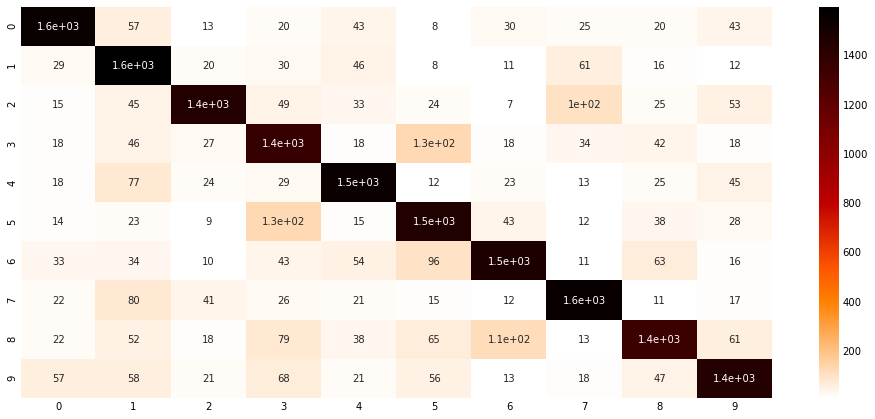

In [41]:
print('Visualizing the confusion matrix')
plt.figure(figsize = (15, 7.2))
sns.heatmap(confusion_matrix(y_test_o, predictions), annot = True,  cmap="gist_heat_r")


In [37]:
model1.predict_classes(X_test)[30]

2

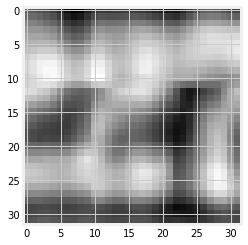

In [38]:
plt.imshow(X_test[30].reshape(32, 32), cmap = 'gray')

In [39]:
model1.predict_classes(X_test)[14]

3

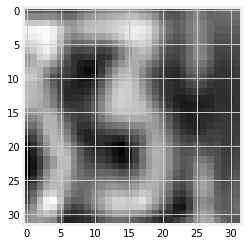

In [40]:
plt.imshow(X_test[14].reshape(32, 32), cmap = 'gray')

In [42]:
# Initialize Sequential model
model_f = tensorflow.keras.models.Sequential()

# Reshape data from 2D to 1D -> 32x32 = 1024 (flattening process)
model_f.add(tensorflow.keras.layers.Reshape((1024,),input_shape=(32,32,)))

# Normalize data using batch
model_f.add(tensorflow.keras.layers.BatchNormalization())

model_f.add(tensorflow.keras.layers.Dense(256, activation='relu', name='Layer_2'))

# Dropout layer
model_f.add(tensorflow.keras.layers.Dropout(0.5))

# Hidden layers
model_f.add(tensorflow.keras.layers.Dense(80, activation='relu', name='Layer_3'))

model_f.add(tensorflow.keras.layers.Dropout(0.2))

model_f.add(tensorflow.keras.layers.Dense(30, activation='relu', name='Layer_4'))

# Dropout layer
model_f.add(tensorflow.keras.layers.Dropout(0.2))

#Output layer
model_f.add(tensorflow.keras.layers.Dense(10, activation='softmax', name='Output'))

In [43]:
model_f.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
model_f.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 1024)              4096      
_________________________________________________________________
Layer_2 (Dense)              (None, 256)               262400    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
Layer_3 (Dense)              (None, 80)                20560     
_________________________________________________________________
dropout_3 (Dropout)          (None, 80)                0         
_________________________________________________________________
Layer_4 (Dense)              (None, 30)               

In [46]:
model_f.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size = 200)

Train on 42000 samples, validate on 60000 samples
Epoch 1/50
42000/42000 [==============================] - 4s 104us/sample - loss: 2.1909 - accuracy: 0.1944 - val_loss: 1.6934 - val_accuracy: 0.4399
Epoch 2/50
42000/42000 [==============================] - 3s 75us/sample - loss: 1.7374 - accuracy: 0.3881 - val_loss: 1.2969 - val_accuracy: 0.6053
Epoch 3/50
42000/42000 [==============================] - 3s 75us/sample - loss: 1.4963 - accuracy: 0.4965 - val_loss: 1.1281 - val_accuracy: 0.6661
Epoch 4/50
42000/42000 [==============================] - 3s 75us/sample - loss: 1.3712 - accuracy: 0.5522 - val_loss: 1.0015 - val_accuracy: 0.7074
Epoch 5/50
42000/42000 [==============================] - 3s 75us/sample - loss: 1.2770 - accuracy: 0.5940 - val_loss: 0.9566 - val_accuracy: 0.7166
Epoch 6/50
42000/42000 [==============================] - 3s 82us/sample - loss: 1.2119 - accuracy: 0.6163 - val_loss: 0.8895 - val_accuracy: 0.7433
Epoch 7/50
42000/42000 [==============================]

In [48]:
model_f.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size = 1024)

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 2s 56us/sample - loss: 0.6506 - accuracy: 0.8032 - val_loss: 0.4399 - val_accuracy: 0.8711
Epoch 2/20
42000/42000 [==============================] - 2s 37us/sample - loss: 0.6238 - accuracy: 0.8124 - val_loss: 0.4336 - val_accuracy: 0.8723
Epoch 3/20
42000/42000 [==============================] - 2s 40us/sample - loss: 0.6207 - accuracy: 0.8135 - val_loss: 0.4285 - val_accuracy: 0.8739
Epoch 4/20
42000/42000 [==============================] - 2s 38us/sample - loss: 0.6158 - accuracy: 0.8145 - val_loss: 0.4248 - val_accuracy: 0.8748
Epoch 5/20
42000/42000 [==============================] - 2s 39us/sample - loss: 0.6124 - accuracy: 0.8142 - val_loss: 0.4222 - val_accuracy: 0.8753
Epoch 6/20
42000/42000 [==============================] - 2s 38us/sample - loss: 0.6195 - accuracy: 0.8137 - val_loss: 0.4215 - val_accuracy: 0.8757
Epoch 7/20
42000/42000 [==============================] 

In [49]:
model_f.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size = 2000)

Train on 42000 samples, validate on 60000 samples
Epoch 1/20
42000/42000 [==============================] - 3s 60us/sample - loss: 0.6017 - accuracy: 0.8176 - val_loss: 0.4141 - val_accuracy: 0.8778
Epoch 2/20
42000/42000 [==============================] - 1s 30us/sample - loss: 0.5891 - accuracy: 0.8220 - val_loss: 0.4035 - val_accuracy: 0.8800
Epoch 3/20
42000/42000 [==============================] - 1s 32us/sample - loss: 0.5804 - accuracy: 0.8259 - val_loss: 0.4015 - val_accuracy: 0.8808
Epoch 4/20
42000/42000 [==============================] - 1s 34us/sample - loss: 0.5719 - accuracy: 0.8285 - val_loss: 0.3998 - val_accuracy: 0.8815
Epoch 5/20
42000/42000 [==============================] - 1s 32us/sample - loss: 0.5705 - accuracy: 0.8270 - val_loss: 0.3985 - val_accuracy: 0.8822
Epoch 6/20
42000/42000 [==============================] - 1s 31us/sample - loss: 0.5686 - accuracy: 0.8265 - val_loss: 0.3973 - val_accuracy: 0.8828
Epoch 7/20
42000/42000 [==============================] 

In [50]:
model_f.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size = 8000)

Train on 42000 samples, validate on 60000 samples
Epoch 1/30
42000/42000 [==============================] - 1s 35us/sample - loss: 0.5574 - accuracy: 0.8331 - val_loss: 0.3887 - val_accuracy: 0.8852
Epoch 2/30
42000/42000 [==============================] - 1s 30us/sample - loss: 0.5604 - accuracy: 0.8304 - val_loss: 0.3879 - val_accuracy: 0.8854
Epoch 3/30
42000/42000 [==============================] - 1s 27us/sample - loss: 0.5587 - accuracy: 0.8310 - val_loss: 0.3869 - val_accuracy: 0.8857
Epoch 4/30
42000/42000 [==============================] - 1s 27us/sample - loss: 0.5569 - accuracy: 0.8303 - val_loss: 0.3862 - val_accuracy: 0.8855
Epoch 5/30
42000/42000 [==============================] - 1s 27us/sample - loss: 0.5543 - accuracy: 0.8331 - val_loss: 0.3859 - val_accuracy: 0.8854
Epoch 6/30
42000/42000 [==============================] - 1s 28us/sample - loss: 0.5574 - accuracy: 0.8314 - val_loss: 0.3858 - val_accuracy: 0.8855
Epoch 7/30
42000/42000 [==============================] 

In [54]:
model_f.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size = 1000)

Train on 42000 samples, validate on 60000 samples
Epoch 1/30
42000/42000 [==============================] - 2s 59us/sample - loss: 0.5609 - accuracy: 0.8282 - val_loss: 0.3846 - val_accuracy: 0.8852
Epoch 2/30
42000/42000 [==============================] - 2s 38us/sample - loss: 0.5631 - accuracy: 0.8306 - val_loss: 0.3846 - val_accuracy: 0.8866
Epoch 3/30
42000/42000 [==============================] - 2s 37us/sample - loss: 0.5620 - accuracy: 0.8294 - val_loss: 0.3861 - val_accuracy: 0.8859
Epoch 4/30
42000/42000 [==============================] - 2s 38us/sample - loss: 0.5657 - accuracy: 0.8311 - val_loss: 0.3859 - val_accuracy: 0.8861
Epoch 5/30
42000/42000 [==============================] - 2s 40us/sample - loss: 0.5624 - accuracy: 0.8295 - val_loss: 0.3831 - val_accuracy: 0.8864
Epoch 6/30
42000/42000 [==============================] - 2s 41us/sample - loss: 0.5542 - accuracy: 0.8313 - val_loss: 0.3839 - val_accuracy: 0.8864
Epoch 7/30
42000/42000 [==============================] 

- As we can see it started with very low accuracy but jumped up pretty quickly. Optimizers have good impact on model. I used the same weights learnt from the last run and increased the batch size.  

In [55]:
model_f.evaluate(X_val, y_val)

60000/60000 [==============================] - 9s 153us/sample - loss: 0.3708 - accuracy: 0.8913


[0.3708001693894466, 0.89126664]

In [56]:
print('Testing the model on test dataset')
predictions = model_f.predict_classes(X_test)
score = model_f.evaluate(X_test, y_test)
print('Test loss :', score[0])
print('Test accuracy :', score[1])

Testing the model on test dataset
18000/18000 [==============================] - 3s 179us/sample - loss: 0.4697 - accuracy: 0.8616
Test loss : 0.4697054890791575
Test accuracy : 0.8616111


- As we keep learning on the same weights the accuracy keeps going up little by little. 
- The Test accuracy is 86% and on validation set it's 89%.

Actual labels: [5 3 7 1 4 8 1 4 2 9]
Predicted labels: [5 3 7 1 4 8 4 4 0 9]


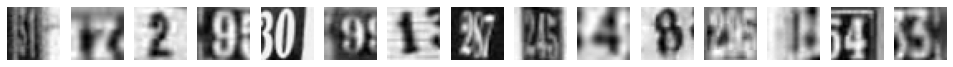

In [68]:
print('Actual labels: %s' % (y_test_o[50:60]))
plt.figure(figsize=(15, 2))
for i in range(15):
    plt.subplot(1, 15, i+1)
    plt.imshow(X_test[i], cmap="gray")
    plt.axis('off')
    
print('Predicted labels: %s' % (predictions[50:60]))

In [69]:
# Classification Report
print(classification_report(y_test_o, predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1814
           1       0.86      0.87      0.86      1828
           2       0.89      0.85      0.87      1803
           3       0.80      0.82      0.81      1719
           4       0.88      0.88      0.88      1812
           5       0.84      0.85      0.84      1768
           6       0.85      0.83      0.84      1832
           7       0.88      0.89      0.89      1808
           8       0.83      0.82      0.82      1812
           9       0.85      0.84      0.84      1804

    accuracy                           0.85     18000
   macro avg       0.85      0.85      0.85     18000
weighted avg       0.85      0.85      0.85     18000



## Conclusion

- We experimented using - Fully connected neural network which does feedforward and backward prop in hidden layers and also used dropout layers. 
- Activation functions used were sigmoid for some models otherwise Relu since it gives better output.
- Optimizers we considered were sgd vanilla gradient and adam. It's said Adam learns quickly and takes leap initially without overshooting. It's best gradient learner and hence when used with fully connected and drop out layers it gives almost 86% accuracy on test set and 89% on validation set.

- We flattened the input layer first to get an elongated matrix. It had just one kernal - Black and white images. The 32x32 matrix was replaced with 1024 size array
- We used batch normalization technique instead of dividing all the values with 255. 
- Classification report shows good prediction of 0 , 4 and 7 class.